In [12]:
!pip install pandas numpy matplotlib seaborn scikit-learn

  Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 621.2 kB/s eta 0:00:17
   - -------------------------------------- 0.5/11.0 MB 621.2 kB/s eta 0:00:17
   -- ------------------------------------- 0.8/11.0 MB 645.7 kB/s eta 0:00:16
   --- ------------------------------------ 1.0/11.0 MB 699.0 kB/s eta 0:00:15
   ---- ----------------------------------- 1.3/11.0 MB 771.6 kB/s eta 0:00:13
   ---- ----------------------------------- 1.3/11.0 MB 771.6 kB/s eta 0:00:13
   ----- ---------------------------------- 1.6/11.0 MB 814.6 kB/s eta 0:00:12
   ------ --------------------------------- 1.8/11.0 MB 846.1 kB/s eta 0:00:11
   ------- ------

In [72]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Thư viện để chia dữ liệu và mã hóa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

# Thiết lập hiển thị đồ họa
%matplotlib inline
sns.set(style="whitegrid")

In [73]:
# Giả sử dữ liệu của bạn được tải từ các file CSV
# Thay 'train.csv' và 'test.csv' bằng đường dẫn tới file dữ liệu của bạn
train_data = pd.read_csv('dataset/loan_sanction_train.csv')
test_data = pd.read_csv('dataset/loan_sanction_test.csv')

In [74]:
# Hiển thị thông tin cơ bản về dữ liệu
print("### Thông tin chung về train dataset ###")
print(train_data.info())

### Thông tin chung về train dataset ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [75]:
print("\n### Một số dòng đầu của train dataset ###")
print(train_data.head())


### Một số dòng đầu của train dataset ###
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0      

In [76]:
print("\n### Thông tin chung về test dataset ###")
print(test_data.info())


### Thông tin chung về test dataset ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB
None


In [77]:
print("\n### Một số dòng đầu của test dataset ###")
print(test_data.head())


### Một số dòng đầu của test dataset ###
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             

In [78]:
print("\n### Thống kê mô tả của train dataset ###")
print(train_data.describe())


### Thống kê mô tả của train dataset ###
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [79]:
print("\n### Kiểm tra dữ liệu thiếu trong train dataset ###")
print(train_data.isnull().sum())


### Kiểm tra dữ liệu thiếu trong train dataset ###
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [80]:
print("\n### Kiểm tra dữ liệu thiếu trong test dataset ###")
print(test_data.isnull().sum())


### Kiểm tra dữ liệu thiếu trong test dataset ###
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [81]:
# Các biến phân loại có dữ liệu thiếu
categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed']

# Điền giá trị mode cho các biến phân loại
for col in categorical_cols:
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)
    test_data[col].fillna(test_data[col].mode()[0], inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\2404666234.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[col].fillna(train_data[col].mode()[0], inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\2404666234.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [82]:
# Các biến số có dữ liệu thiếu
numerical_cols = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Điền giá trị trung vị cho các biến số
for col in numerical_cols:
    train_data[col].fillna(train_data[col].median(), inplace=True)
    test_data[col].fillna(test_data[col].median(), inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\3727358760.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[col].fillna(train_data[col].median(), inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\3727358760.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [83]:
print("\n### Kiểm tra dữ liệu thiếu sau khi xử lý trong train dataset ###")
print(train_data.isnull().sum())


### Kiểm tra dữ liệu thiếu sau khi xử lý trong train dataset ###
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [84]:
print("\n### Kiểm tra dữ liệu thiếu sau khi xử lý trong test dataset ###")
print(test_data.isnull().sum())


### Kiểm tra dữ liệu thiếu sau khi xử lý trong test dataset ###
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [85]:
# Các biến phân loại nhị phân
binary_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status']

# Khởi tạo LabelEncoder
le = LabelEncoder()

# Mã hóa các biến nhị phân trong tập huấn luyện và kiểm tra
for col in binary_cols:
    train_data[col] = le.fit_transform(train_data[col])
    if col in test_data.columns:
        test_data[col] = le.transform(test_data[col])  # Áp dụng cùng bộ mã hóa cho test

In [31]:
# Các biến số có dữ liệu thiếu
numerical_cols = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Điền giá trị trung vị cho các biến số
for col in numerical_cols:
    data[col].fillna(data[col].median(), inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\2750180470.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\2750180470.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [86]:
# Các biến phân loại không nhị phân
multi_cols = ['Dependents', 'Property_Area']

# Sử dụng One-Hot Encoding và loại bỏ cột đầu tiên để tránh giả định thứ tự
train_data = pd.get_dummies(train_data, columns=multi_cols, drop_first=True)
test_data = pd.get_dummies(test_data, columns=multi_cols, drop_first=True)

print("\n### Dữ liệu train sau khi mã hóa ###")
print(train_data.head())

print("\n### Dữ liệu test sau khi mã hóa ###")
print(test_data.head())


### Dữ liệu train sau khi mã hóa ###
    Loan_ID  Gender  Married  Education  Self_Employed  ApplicantIncome  \
0  LP001002       1        0          0              0             5849   
1  LP001003       1        1          0              0             4583   
2  LP001005       1        1          0              1             3000   
3  LP001006       1        1          1              0             2583   
4  LP001008       1        0          0              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       128.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

   Loan_Status  Dependents_1  Dependents_2  Dependents_3+  \
0            1         False 

In [87]:
# Khởi tạo StandardScaler
scaler = StandardScaler()

# Các biến số cần chuẩn hóa
scale_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Chuẩn hóa các biến số trong tập huấn luyện và kiểm tra
train_data[scale_cols] = scaler.fit_transform(train_data[scale_cols])
test_data[scale_cols] = scaler.transform(test_data[scale_cols])

print("\n### Dữ liệu train sau khi chuẩn hóa ###")
print(train_data.head())

print("\n### Dữ liệu test sau khi chuẩn hóa ###")
print(test_data.head())


### Dữ liệu train sau khi chuẩn hóa ###
    Loan_ID  Gender  Married  Education  Self_Employed  ApplicantIncome  \
0  LP001002       1        0          0              0         0.072991   
1  LP001003       1        1          0              0        -0.134412   
2  LP001005       1        1          0              1        -0.393747   
3  LP001006       1        1          1              0        -0.462062   
4  LP001008       1        0          0              0         0.097728   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0          -0.554487   -0.211241          0.273231             1.0   
1          -0.038732   -0.211241          0.273231             1.0   
2          -0.554487   -0.948996          0.273231             1.0   
3           0.251980   -0.306435          0.273231             1.0   
4          -0.554487   -0.056551          0.273231             1.0   

   Loan_Status  Dependents_1  Dependents_2  Dependents_3+  \
0            1         Fal

In [88]:
# Giả sử 'Loan_Status' là biến mục tiêu
X_train = train_data.drop('Loan_Status', axis=1)
y_train = train_data['Loan_Status']

# Tập test không chứa 'Loan_Status', vì vậy chúng ta không cần y_test
X_test = test_data.copy()

print("\n### Kích thước tập huấn luyện và kiểm tra ###")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")


### Kích thước tập huấn luyện và kiểm tra ###
X_train: (614, 15), X_test: (367, 15)
y_train: (614,)


In [90]:
print("\n### Kiểm tra kiểu dữ liệu của các cột trong X_train ###")
print(X_train.dtypes)


### Kiểm tra kiểu dữ liệu của các cột trong X_train ###
Loan_ID                     object
Gender                       int64
Married                      int64
Education                    int64
Self_Employed                int64
ApplicantIncome            float64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Dependents_1                  bool
Dependents_2                  bool
Dependents_3+                 bool
Property_Area_Semiurban       bool
Property_Area_Urban           bool
dtype: object


In [94]:
print("\n### Kiểm tra dữ liệu thiếu trong X_train ###")
print(X_train.isnull().sum())


### Kiểm tra dữ liệu thiếu trong X_train ###
Loan_ID                    0
Gender                     0
Married                    0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64


In [95]:
print("\n### Kiểm tra kiểu dữ liệu của các cột trong X_test ###")
print(X_test.dtypes)


### Kiểm tra kiểu dữ liệu của các cột trong X_test ###
Loan_ID                     object
Gender                       int64
Married                      int64
Education                    int64
Self_Employed                int64
ApplicantIncome            float64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Dependents_1                  bool
Dependents_2                  bool
Dependents_3+                 bool
Property_Area_Semiurban       bool
Property_Area_Urban           bool
dtype: object


In [96]:
print("\n### Kiểm tra dữ liệu thiếu trong X_test ###")
print(X_test.isnull().sum())


### Kiểm tra dữ liệu thiếu trong X_test ###
Loan_ID                    0
Gender                     0
Married                    0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64


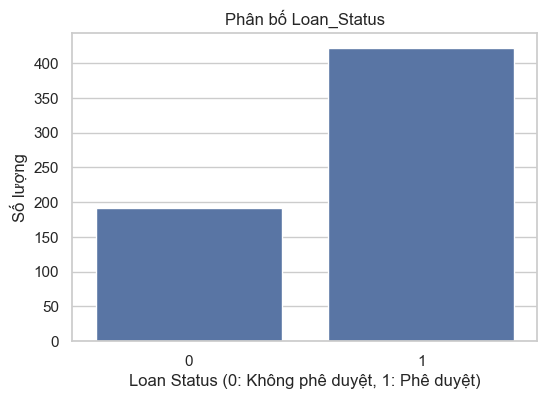

In [97]:
# Vẽ biểu đồ phân bố của biến mục tiêu Loan_Status
plt.figure(figsize=(6, 4))
sns.countplot(x='Loan_Status', data=train_data)
plt.title('Phân bố Loan_Status')
plt.xlabel('Loan Status (0: Không phê duyệt, 1: Phê duyệt)')
plt.ylabel('Số lượng')
plt.show()

In [99]:
# Kiểm tra tên cột của train_data
print("Tên các cột trong train_data sau khi mã hóa:")
print(train_data.columns)

Tên các cột trong train_data sau khi mã hóa:
Index(['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')


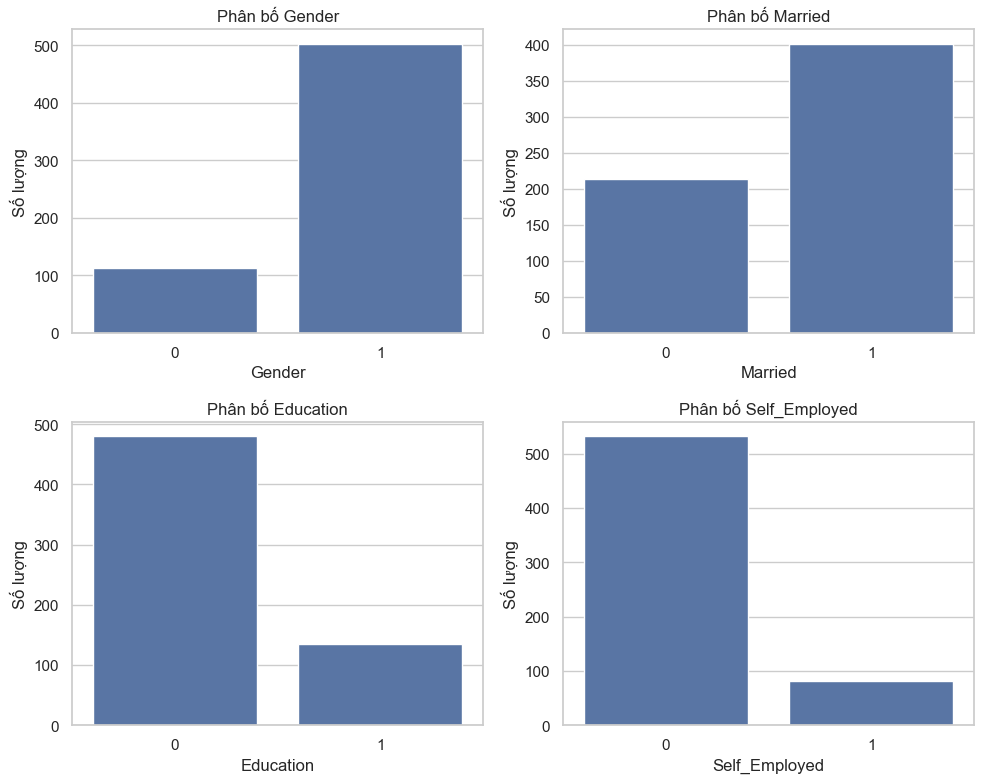

In [100]:
# Cập nhật danh sách categorical_features cho các biến phân loại không bị mã hóa
categorical_features = ['Gender', 'Married', 'Education', 'Self_Employed']

plt.figure(figsize=(10, 8))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=feature, data=train_data)
    plt.title(f'Phân bố {feature}')
    plt.xlabel(feature)
    plt.ylabel('Số lượng')
plt.tight_layout()
plt.show()

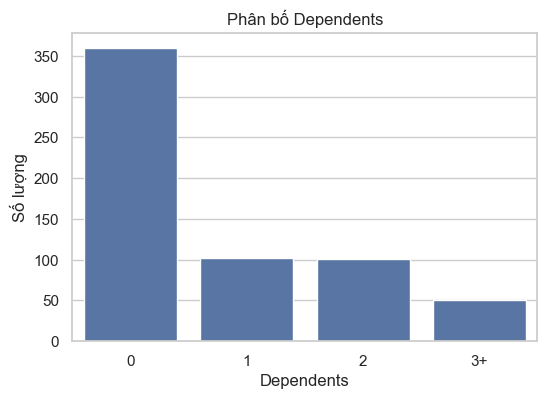

In [101]:
# Tính tổng số lượng của từng nhóm trong Dependents
dependents_counts = {
    '0': len(train_data) - train_data[['Dependents_1', 'Dependents_2', 'Dependents_3+']].sum().sum(),
    '1': train_data['Dependents_1'].sum(),
    '2': train_data['Dependents_2'].sum(),
    '3+': train_data['Dependents_3+'].sum()
}

# Vẽ biểu đồ
plt.figure(figsize=(6, 4))
sns.barplot(x=list(dependents_counts.keys()), y=list(dependents_counts.values()))
plt.title('Phân bố Dependents')
plt.xlabel('Dependents')
plt.ylabel('Số lượng')
plt.show()

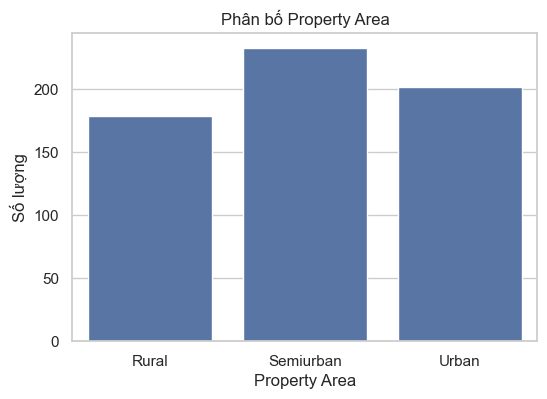

In [102]:
# Tính tổng số lượng của từng nhóm trong Property_Area
property_area_counts = {
    'Rural': len(train_data) - train_data[['Property_Area_Semiurban', 'Property_Area_Urban']].sum().sum(),
    'Semiurban': train_data['Property_Area_Semiurban'].sum(),
    'Urban': train_data['Property_Area_Urban'].sum()
}

# Vẽ biểu đồ
plt.figure(figsize=(6, 4))
sns.barplot(x=list(property_area_counts.keys()), y=list(property_area_counts.values()))
plt.title('Phân bố Property Area')
plt.xlabel('Property Area')
plt.ylabel('Số lượng')
plt.show()

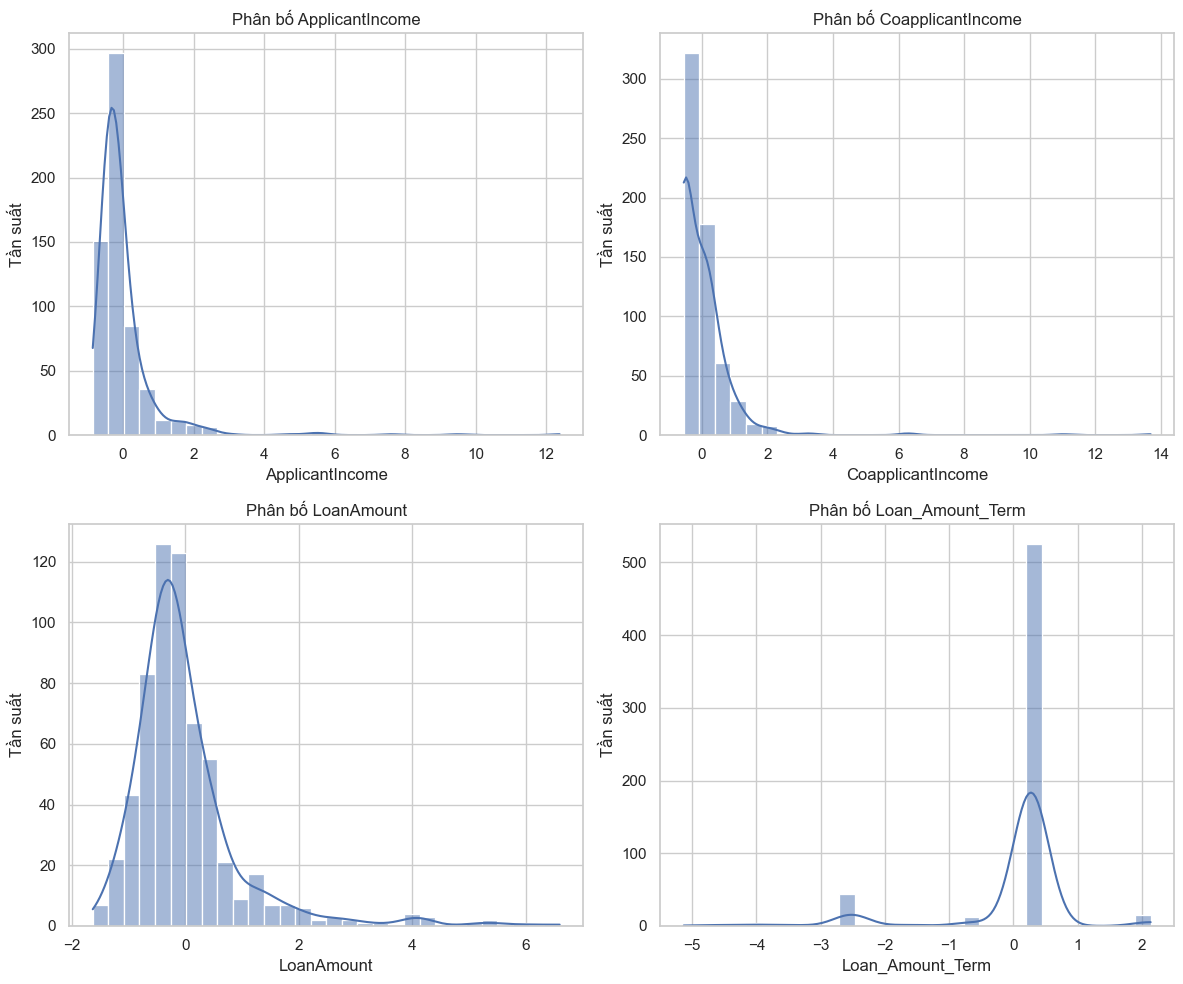

In [103]:
# Vẽ biểu đồ phân bố cho các biến số
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

plt.figure(figsize=(12, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(train_data[feature], kde=True, bins=30)
    plt.title(f'Phân bố {feature}')
    plt.xlabel(feature)
    plt.ylabel('Tần suất')
plt.tight_layout()
plt.show()

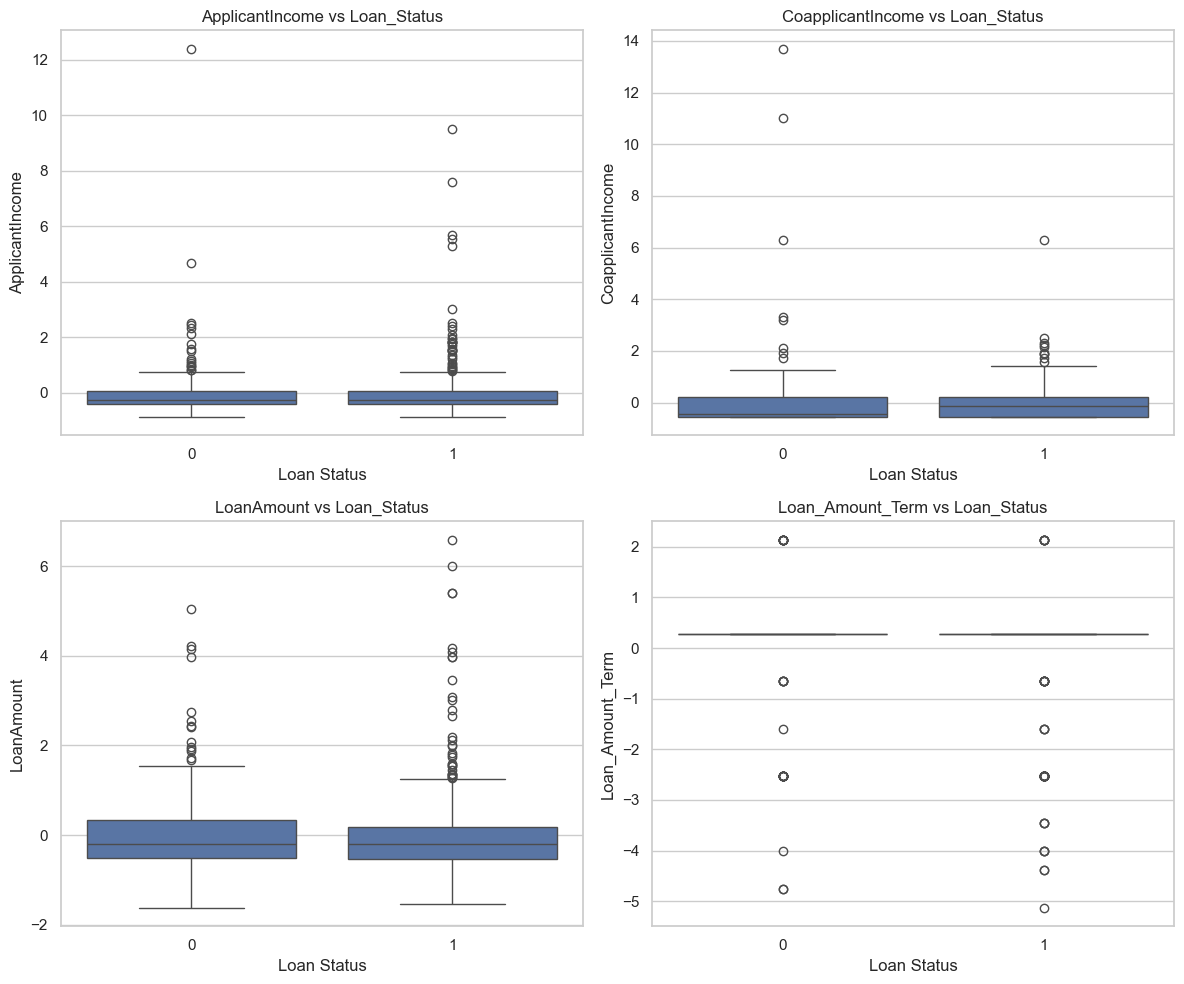

In [104]:
# Vẽ biểu đồ boxplot cho các biến số dựa trên Loan_Status
plt.figure(figsize=(12, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Loan_Status', y=feature, data=train_data)
    plt.title(f'{feature} vs Loan_Status')
    plt.xlabel('Loan Status')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

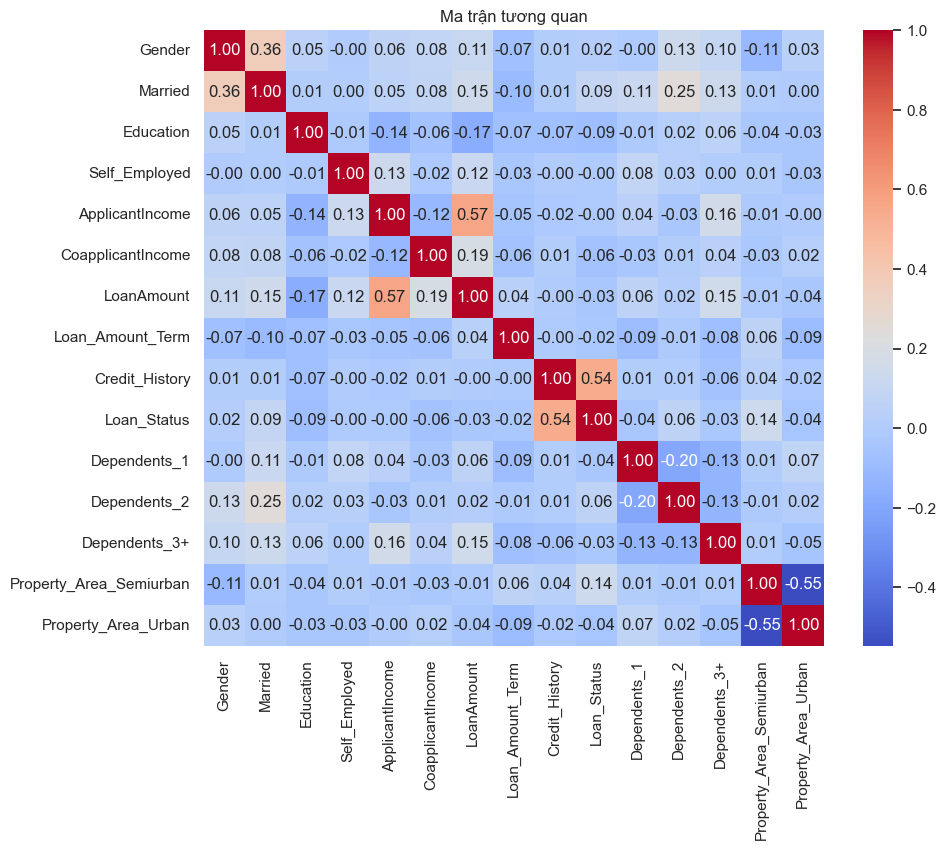

In [106]:
# Loại bỏ cột Loan_ID khỏi train_data khi tính toán ma trận tương quan
train_data_numeric = train_data.drop('Loan_ID', axis=1)

# Tính toán ma trận tương quan
plt.figure(figsize=(10, 8))
correlation_matrix = train_data_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Ma trận tương quan')
plt.show()

In [45]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.4 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 4.7 MB/s eta 0:00:00


In [107]:
import lightgbm as lgb
import optuna
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.feature_selection import RFE
import joblib
import pandas as pd
import numpy as np

In [108]:
# Giả sử train_data là dữ liệu đã tiền xử lý và đã mã hóa
X = train_data.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = train_data['Loan_Status']

# Tách thành tập huấn luyện và kiểm tra
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [114]:
from lightgbm import early_stopping
from lightgbm import log_evaluation

def objective(trial):
    # Các tham số cần tối ưu
    param = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'boosting_type': 'gbdt',
        'num_leaves': trial.suggest_int('num_leaves', 20, 50),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'num_boost_round': trial.suggest_int('n_estimators', 100, 500),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 50),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.6, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
        'verbose': -1,
        'random_state': 42
    }

    # Chuẩn bị dữ liệu cho LightGBM
    train_data = lgb.Dataset(X_train, label=y_train)
    valid_data = lgb.Dataset(X_val, label=y_val, reference=train_data)
    
    # Huấn luyện mô hình với callback early_stopping
    model = lgb.train(
        param,
        train_data,
        valid_sets=[valid_data],
        num_boost_round=500,
        callbacks=[early_stopping(stopping_rounds=10), log_evaluation(0)]
    )
    
    # Dự đoán và tính toán ROC-AUC
    y_pred_proba = model.predict(X_val, num_iteration=model.best_iteration)
    roc_auc = roc_auc_score(y_val, y_pred_proba)
    return roc_auc

In [115]:
# Khởi tạo và chạy study tối ưu hóa
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# In ra tham số tốt nhất
print(f"Best ROC-AUC: {study.best_value}")
print(f"Best Parameters: {study.best_params}")

[I 2024-10-28 08:24:14,849] A new study created in memory with name: no-name-5588166b-8f2d-4f2c-8ac3-296f6e7c9ad7
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releas

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[115]	valid_0's binary_logloss: 0.443291
Training until validation scores don't improve for 10 rounds


C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.6, 1.0

Early stopping, best iteration is:
[142]	valid_0's binary_logloss: 0.445213
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[119]	valid_0's binary_logloss: 0.440178
Training until validation scores don't improve for 10 rounds


[I 2024-10-28 08:24:15,355] Trial 3 finished with value: 0.7873065015479876 and parameters: {'num_leaves': 33, 'learning_rate': 0.013812775876405458, 'n_estimators': 318, 'min_child_samples': 41, 'feature_fraction': 0.8116258843584309, 'bagging_fraction': 0.6278963563133504, 'bagging_freq': 4}. Best is trial 0 with value: 0.7959752321981425.
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_frac

Early stopping, best iteration is:
[173]	valid_0's binary_logloss: 0.442305
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[36]	valid_0's binary_logloss: 0.459678
Training until validation scores don't improve for 10 rounds


C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.6, 1.0

Early stopping, best iteration is:
[242]	valid_0's binary_logloss: 0.438133
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[41]	valid_0's binary_logloss: 0.439168
Training until validation scores don't improve for 10 rounds


C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.6, 1.0

Early stopping, best iteration is:
[146]	valid_0's binary_logloss: 0.444776
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[199]	valid_0's binary_logloss: 0.442934


C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.6, 1.0

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[85]	valid_0's binary_logloss: 0.424787
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.454599


[I 2024-10-28 08:24:16,492] Trial 11 finished with value: 0.7978328173374614 and parameters: {'num_leaves': 43, 'learning_rate': 0.0279945173012605, 'n_estimators': 500, 'min_child_samples': 27, 'feature_fraction': 0.8981810651887968, 'bagging_fraction': 0.6999002335186828, 'bagging_freq': 10}. Best is trial 7 with value: 0.8071207430340558.
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_frac

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[80]	valid_0's binary_logloss: 0.437625
Training until validation scores don't improve for 10 rounds


[I 2024-10-28 08:24:16,750] Trial 12 finished with value: 0.8111455108359134 and parameters: {'num_leaves': 50, 'learning_rate': 0.03037265267722146, 'n_estimators': 495, 'min_child_samples': 11, 'feature_fraction': 0.6983398539324934, 'bagging_fraction': 0.9737642128914616, 'bagging_freq': 8}. Best is trial 12 with value: 0.8111455108359134.


Early stopping, best iteration is:
[57]	valid_0's binary_logloss: 0.460523
Training until validation scores don't improve for 10 rounds


C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.6, 1.0

Early stopping, best iteration is:
[53]	valid_0's binary_logloss: 0.456192
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[38]	valid_0's binary_logloss: 0.464512


C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.6, 1.0

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[74]	valid_0's binary_logloss: 0.454739


C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.6, 1.0

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[41]	valid_0's binary_logloss: 0.439784
Training until validation scores don't improve for 10 rounds


C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.6, 1.0

Early stopping, best iteration is:
[100]	valid_0's binary_logloss: 0.436524
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[28]	valid_0's binary_logloss: 0.452909


C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.6, 1.0

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[67]	valid_0's binary_logloss: 0.448416


C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.6, 1.0

Training until validation scores don't improve for 10 rounds


[I 2024-10-28 08:24:18,630] Trial 20 finished with value: 0.8068111455108359 and parameters: {'num_leaves': 44, 'learning_rate': 0.010401713756002596, 'n_estimators': 224, 'min_child_samples': 10, 'feature_fraction': 0.6042438481206172, 'bagging_fraction': 0.8856123710320906, 'bagging_freq': 3}. Best is trial 13 with value: 0.8229102167182663.


Early stopping, best iteration is:
[151]	valid_0's binary_logloss: 0.475131
Training until validation scores don't improve for 10 rounds


C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.6, 1.0

Early stopping, best iteration is:
[102]	valid_0's binary_logloss: 0.450655
Training until validation scores don't improve for 10 rounds


C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.6, 1.0

Early stopping, best iteration is:
[72]	valid_0's binary_logloss: 0.456206
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[49]	valid_0's binary_logloss: 0.450886


C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.6, 1.0

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[80]	valid_0's binary_logloss: 0.449223


C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.6, 1.0),
f:\PhanQuangPhat_HomeLoanApproval\.venv\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[I 2024-10-28 08:24:19,917] Trial 25 finished with value: 0.8021671826625387 and parameters: {'num_leaves': 40, 'learning_rate': 0.021187280045143326, 'n_estimators': 311, 'min_child_samples': 22, 'feature_fraction': 0.6310193154430717, 'bagging_fraction': 0.7437532750766213, 'bagging_freq': 6}. Best is trial 13 with value: 0.8229102167182663.
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:11: FutureWarning: sug

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[134]	valid_0's binary_logloss: 0.437808


f:\PhanQuangPhat_HomeLoanApproval\.venv\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[I 2024-10-28 08:24:20,106] Trial 26 finished with value: 0.7947368421052632 and parameters: {'num_leaves': 48, 'learning_rate': 0.07355392004587319, 'n_estimators': 359, 'min_child_samples': 10, 'feature_fraction': 0.7202821990228506, 'bagging_fraction': 0.970067720752603, 'bagging_freq': 9}. Best is trial 13 with value: 0.8229102167182663.
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:14: Futu

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[35]	valid_0's binary_logloss: 0.453618
Training until validation scores don't improve for 10 rounds


[I 2024-10-28 08:24:20,283] Trial 27 finished with value: 0.8015479876160991 and parameters: {'num_leaves': 45, 'learning_rate': 0.051991181745887384, 'n_estimators': 437, 'min_child_samples': 16, 'feature_fraction': 0.6843492470448471, 'bagging_fraction': 0.8231597266488813, 'bagging_freq': 4}. Best is trial 13 with value: 0.8229102167182663.
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fr

Early stopping, best iteration is:
[57]	valid_0's binary_logloss: 0.446512
Training until validation scores don't improve for 10 rounds


C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.6, 1.0),
f:\PhanQuangPhat_HomeLoanApproval\.venv\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[I 2024-10-28 08:24:20,583] Trial 28 finished with value: 0.7851393188854489 and parameters: {'num_leaves': 39, 'learning_rate': 0.033773503616141086, 'n_estimators': 200, 'min_child_samples': 13, 'feature_fraction': 0.7867414917337514, 'bagging_fraction': 0.7474171414265909, 'bagging_freq': 7}. Best is trial 13 with value: 0.8229102167182663.
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:11: FutureWarning: sug

Early stopping, best iteration is:
[78]	valid_0's binary_logloss: 0.455558
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[103]	valid_0's binary_logloss: 0.431554


C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.6, 1.0

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[73]	valid_0's binary_logloss: 0.44299
Training until validation scores don't improve for 10 rounds


C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.6, 1.0),
f:\PhanQuangPhat_HomeLoanApproval\.venv\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[I 2024-10-28 08:24:21,149] Trial 31 finished with value: 0.8003095975232198 and parameters: {'num_leaves': 49, 'learning_rate': 0.018893012632386533, 'n_estimators': 175, 'min_child_samples': 29, 'feature_fraction': 0.9172042762343423, 'bagging_fraction': 0.8512916207968282, 'bagging_freq': 7}. Best is trial 13 with value: 0.8229102167182663.
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:11: FutureWarning: sug

Early stopping, best iteration is:
[91]	valid_0's binary_logloss: 0.436667
Training until validation scores don't improve for 10 rounds


f:\PhanQuangPhat_HomeLoanApproval\.venv\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[I 2024-10-28 08:24:21,418] Trial 32 finished with value: 0.8089783281733747 and parameters: {'num_leaves': 46, 'learning_rate': 0.024392881036823234, 'n_estimators': 233, 'min_child_samples': 19, 'feature_fraction': 0.834355667500203, 'bagging_fraction': 0.9010997560477041, 'bagging_freq': 5}. Best is trial 13 with value: 0.8229102167182663.
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:14: Fut

Early stopping, best iteration is:
[102]	valid_0's binary_logloss: 0.443264
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[108]	valid_0's binary_logloss: 0.437263


C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.6, 1.0

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[94]	valid_0's binary_logloss: 0.427893


C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.6, 1.0

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[108]	valid_0's binary_logloss: 0.443129


C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.6, 1.0

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[73]	valid_0's binary_logloss: 0.427922
Training until validation scores don't improve for 10 rounds


C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.6, 1.0),
f:\PhanQuangPhat_HomeLoanApproval\.venv\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[I 2024-10-28 08:24:22,421] Trial 37 finished with value: 0.7900928792569659 and parameters: {'num_leaves': 48, 'learning_rate': 0.04334065704360656, 'n_estimators': 110, 'min_child_samples': 23, 'feature_fraction': 0.83469704603021, 'bagging_fraction': 0.8808656615397004, 'bagging_freq': 9}. Best is trial 13 with value: 0.8229102167182663.
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:11: FutureWarning: sugges

Early stopping, best iteration is:
[52]	valid_0's binary_logloss: 0.441639
Training until validation scores don't improve for 10 rounds


[I 2024-10-28 08:24:22,669] Trial 38 finished with value: 0.8043343653250774 and parameters: {'num_leaves': 46, 'learning_rate': 0.02574543804917563, 'n_estimators': 294, 'min_child_samples': 12, 'feature_fraction': 0.7611992491526101, 'bagging_fraction': 0.83297761586846, 'bagging_freq': 5}. Best is trial 13 with value: 0.8229102167182663.


Early stopping, best iteration is:
[73]	valid_0's binary_logloss: 0.450945
Training until validation scores don't improve for 10 rounds


C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.6, 1.0

Early stopping, best iteration is:
[90]	valid_0's binary_logloss: 0.450994
Training until validation scores don't improve for 10 rounds


C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.6, 1.0

Early stopping, best iteration is:
[155]	valid_0's binary_logloss: 0.43541
Training until validation scores don't improve for 10 rounds


C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.6, 1.0

Early stopping, best iteration is:
[107]	valid_0's binary_logloss: 0.436138
Training until validation scores don't improve for 10 rounds


C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.6, 1.0

Did not meet early stopping. Best iteration is:
[128]	valid_0's binary_logloss: 0.438162
Training until validation scores don't improve for 10 rounds


C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.6, 1.0

Early stopping, best iteration is:
[133]	valid_0's binary_logloss: 0.451927
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[127]	valid_0's binary_logloss: 0.439608


C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.6, 1.0

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[76]	valid_0's binary_logloss: 0.455866


f:\PhanQuangPhat_HomeLoanApproval\.venv\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[I 2024-10-28 08:24:24,813] Trial 46 finished with value: 0.8027863777089784 and parameters: {'num_leaves': 49, 'learning_rate': 0.03182104748130882, 'n_estimators': 197, 'min_child_samples': 27, 'feature_fraction': 0.9263410448565078, 'bagging_fraction': 0.9118530105215304, 'bagging_freq': 3}. Best is trial 13 with value: 0.8229102167182663.


Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[73]	valid_0's binary_logloss: 0.432247


C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.6, 1.0

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[73]	valid_0's binary_logloss: 0.45637
Training until validation scores don't improve for 10 rounds


C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
C:\Users\DELL\AppData\Local\Temp\ipykernel_14908\1748004850.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.6, 1.0),
f:\PhanQuangPhat_HomeLoanApproval\.venv\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[I 2024-10-28 08:24:25,199] Trial 48 finished with value: 0.7916408668730651 and parameters: {'num_lea

Early stopping, best iteration is:
[72]	valid_0's binary_logloss: 0.448783
Training until validation scores don't improve for 10 rounds


f:\PhanQuangPhat_HomeLoanApproval\.venv\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[I 2024-10-28 08:24:25,447] Trial 49 finished with value: 0.8024767801857585 and parameters: {'num_leaves': 49, 'learning_rate': 0.04640729058514314, 'n_estimators': 123, 'min_child_samples': 12, 'feature_fraction': 0.6261847741968952, 'bagging_fraction': 0.8942343945053844, 'bagging_freq': 10}. Best is trial 13 with value: 0.8229102167182663.


Early stopping, best iteration is:
[72]	valid_0's binary_logloss: 0.450508
Best ROC-AUC: 0.8229102167182663
Best Parameters: {'num_leaves': 50, 'learning_rate': 0.05148899144821088, 'n_estimators': 208, 'min_child_samples': 11, 'feature_fraction': 0.6026959996837403, 'bagging_fraction': 0.96652789181358, 'bagging_freq': 8}


In [116]:
# Tạo các đặc trưng mới như tỷ lệ nợ trên thu nhập và tổng thu nhập
X_train['Debt_to_Income'] = X_train['LoanAmount'] / (X_train['ApplicantIncome'] + X_train['CoapplicantIncome'] + 1)
X_val['Debt_to_Income'] = X_val['LoanAmount'] / (X_val['ApplicantIncome'] + X_val['CoapplicantIncome'] + 1)

X_train['Total_Income'] = X_train['ApplicantIncome'] + X_train['CoapplicantIncome']
X_val['Total_Income'] = X_val['ApplicantIncome'] + X_val['CoapplicantIncome']

In [117]:
# Sử dụng RFE để chọn lọc các đặc trưng quan trọng nhất
model = lgb.LGBMClassifier(n_estimators=100, random_state=42)
rfe = RFE(estimator=model, n_features_to_select=10)
rfe.fit(X_train, y_train)

# Giữ lại các đặc trưng đã chọn
selected_features = X_train.columns[rfe.support_]
X_train = X_train[selected_features]
X_val = X_val[selected_features]

print("Các đặc trưng được chọn:", selected_features)

Các đặc trưng được chọn: Index(['Married', 'Education', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Credit_History', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Debt_to_Income', 'Total_Income'],
      dtype='object')


In [118]:
# Sử dụng SMOTE để cân bằng lại tập huấn luyện
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print(f"After SMOTE, class distribution: {np.bincount(y_train_res)}")

After SMOTE, class distribution: [337 337]


In [124]:
from lightgbm import early_stopping, log_evaluation

# Sử dụng tham số tối ưu từ Optuna
best_params = study.best_params
lgbm_model = lgb.LGBMClassifier(**best_params)

# Huấn luyện mô hình với các callbacks cho early_stopping và log_evaluation
lgbm_model.fit(
    X_train_res, 
    y_train_res,
    eval_set=[(X_val, y_val)],
    eval_metric='binary_logloss',
    callbacks=[early_stopping(stopping_rounds=10), log_evaluation(period=1)]  # period=1 để log sau mỗi vòng
)

print("### Mô hình LightGBM đã được huấn luyện thành công với các tham số tối ưu! ###")

[1]	valid_0's binary_logloss: 0.674441
Training until validation scores don't improve for 10 rounds
[2]	valid_0's binary_logloss: 0.671998
[3]	valid_0's binary_logloss: 0.65701
[4]	valid_0's binary_logloss: 0.655591
[5]	valid_0's binary_logloss: 0.638185
[6]	valid_0's binary_logloss: 0.635623
[7]	valid_0's binary_logloss: 0.620238
[8]	valid_0's binary_logloss: 0.605911
[9]	valid_0's binary_logloss: 0.605863
[10]	valid_0's binary_logloss: 0.607912
[11]	valid_0's binary_logloss: 0.603837
[12]	valid_0's binary_logloss: 0.596202
[13]	valid_0's binary_logloss: 0.58709
[14]	valid_0's binary_logloss: 0.57727
[15]	valid_0's binary_logloss: 0.567847
[16]	valid_0's binary_logloss: 0.567129
[17]	valid_0's binary_logloss: 0.558503
[18]	valid_0's binary_logloss: 0.550445
[19]	valid_0's binary_logloss: 0.544253
[20]	valid_0's binary_logloss: 0.537978
[21]	valid_0's binary_logloss: 0.530827
[22]	valid_0's binary_logloss: 0.531326
[23]	valid_0's binary_logloss: 0.532547
[24]	valid_0's binary_logloss: 

In [125]:
# Khởi tạo các mô hình cho Voting Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
lgbm = lgb.LGBMClassifier(**best_params)

# Tạo Voting Classifier
ensemble = VotingClassifier(estimators=[
    ('rf', rf),
    ('lgbm', lgbm)
], voting='soft')

# Huấn luyện Voting Classifier
ensemble.fit(X_train_res, y_train_res)

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('lgbm',
                              LGBMClassifier(bagging_fraction=0.96652789181358,
                                             bagging_freq=8,
                                             feature_fraction=0.6026959996837403,
                                             learning_rate=0.05148899144821088,
                                             min_child_samples=11,
                                             n_estimators=208,
                                             num_leaves=50))],
                 voting='soft')

In [126]:
# Dự đoán và tính toán các chỉ số đánh giá cho Voting Classifier
y_pred = ensemble.predict(X_val)
y_pred_proba = ensemble.predict_proba(X_val)[:,1]

accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)

print(f"Ensemble Model Accuracy: {accuracy:.4f}")
print(f"Ensemble Model Precision: {precision:.4f}")
print(f"Ensemble Model Recall: {recall:.4f}")
print(f"Ensemble Model F1-Score: {f1:.4f}")
print(f"Ensemble Model ROC-AUC: {roc_auc:.4f}")

Ensemble Model Accuracy: 0.7967
Ensemble Model Precision: 0.8488
Ensemble Model Recall: 0.8588
Ensemble Model F1-Score: 0.8538
Ensemble Model ROC-AUC: 0.8139


In [127]:
# Dự đoán và tính toán các chỉ số đánh giá cho LightGBM
y_pred_lgbm = lgbm_model.predict(X_val)
y_pred_proba_lgbm = lgbm_model.predict_proba(X_val)[:,1]

accuracy_lgbm = accuracy_score(y_val, y_pred_lgbm)
precision_lgbm = precision_score(y_val, y_pred_lgbm)
recall_lgbm = recall_score(y_val, y_pred_lgbm)
f1_lgbm = f1_score(y_val, y_pred_lgbm)
roc_auc_lgbm = roc_auc_score(y_val, y_pred_proba_lgbm)

print(f"Final LightGBM Model Accuracy: {accuracy_lgbm:.4f}")
print(f"Final LightGBM Model Precision: {precision_lgbm:.4f}")
print(f"Final LightGBM Model Recall: {recall_lgbm:.4f}")
print(f"Final LightGBM Model F1-Score: {f1_lgbm:.4f}")
print(f"Final LightGBM Model ROC-AUC: {roc_auc_lgbm:.4f}")

Final LightGBM Model Accuracy: 0.8130
Final LightGBM Model Precision: 0.8690
Final LightGBM Model Recall: 0.8588
Final LightGBM Model F1-Score: 0.8639
Final LightGBM Model ROC-AUC: 0.7950


In [128]:
# Lưu mô hình LightGBM đã tối ưu
joblib.dump(lgbm_model, 'optimized_lightgbm_model.pkl')
print("### Mô hình LightGBM đã được lưu thành công dưới định dạng .pkl! ###")

### Mô hình LightGBM đã được lưu thành công dưới định dạng .pkl! ###


In [129]:
# Lưu mô hình Voting Classifier
joblib.dump(ensemble, 'voting_classifier_model.pkl')
print("### Mô hình Voting Classifier đã được lưu thành công dưới định dạng .pkl! ###")

### Mô hình Voting Classifier đã được lưu thành công dưới định dạng .pkl! ###
